In [2]:
%matplotlib inline
import numpy as np
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import pandas as pd
import dask
import os.path
from __future__ import division
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
matplotlib.rcParams['contour.negative_linestyle']= 'dashed'
plt.rcParams['image.cmap'] = 'RdBu'

from progress_bar import *
from useful import *

global data_dir
data_dir = '/scratch/ap587/dry_data/'



In [11]:
exp = 'exp10'
exps = get_exps(data_dir+'processed/',exp)
print(exps)
exp = exps[0]

dsf = open_zmean_runset(data_dir, exp)

['exp10_venus1.0']


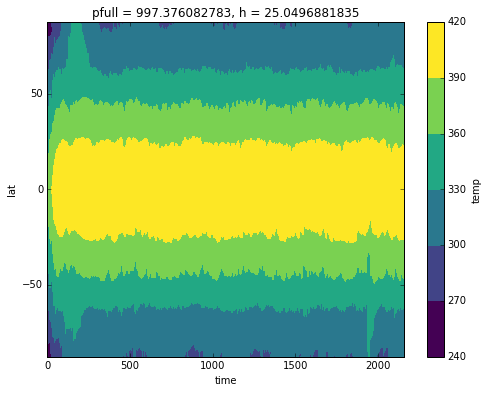

In [9]:
dsf.temp.isel(pfull=-1).plot.contourf(x='time', y='lat')

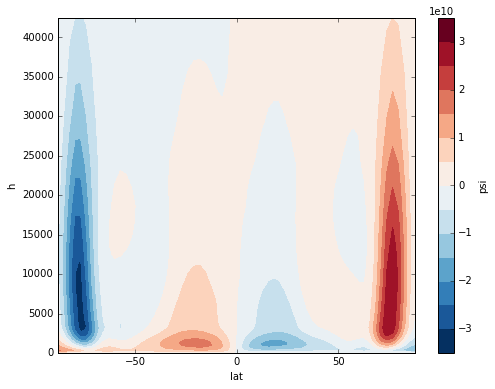

In [26]:
ds = dsf.isel(time=slice(720,None))

ds = ds.groupby('day').mean('time')

ds.coords['logpfull'] = np.log(ds.pfull)
ds.psi.mean('day').plot.contourf(x='lat',y='h',levels=15)

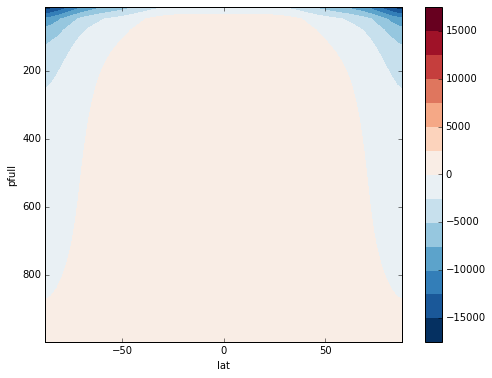

In [23]:
(ds.height-ds.h).mean('day').plot.contourf(levels=15)
plt.gca().invert_yaxis()

In [25]:
if 'height' in ds.keys():
    print('heyo')
    
print ds.keys()

heyo
['latb', 'lonb', 'phalf', 'pfull', 'lat', 'h', 'ucomp', 'h_trop', 'psi', 'h_trop_calc', 'vcomp', 'height', 'p_trop_calc', 'vor', 'teq', 'bk', 'omega', 'ucomp_vcomp', 'ps', 'temp', 'ucomp_sq', 'p_trop', 'ucomp_omega', 'div', 'day', 'logpfull']
